In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

In [ ]:
ds_url = "https://www.kaggle.com/datasets/mahabuburrahman/celeba"

In [ ]:
od.download(ds_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurbh
Your Kaggle Key: ··········


100%|██████████| 1.70G/1.70G [00:18<00:00, 101MB/s]


In [ ]:
path = '/content/celeba/dataset'
def plot_image(path, set_):
    new_path = os.path.join(path, 'Train', set_)
    fig, ax = plt.subplots(5,5, figsize=(20,10))
    fig.suptitle(set_ + 'Faces')
    k = 0
    for j in range(0,5,1):
        for i in range(0,5,1):
            img = load_img(os.path.join(new_path, os.listdir(os.path.join(new_path))[k]))
            ax[i,j].imshow(img)
            ax[i,j].set_title("")
            ax[i,j].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

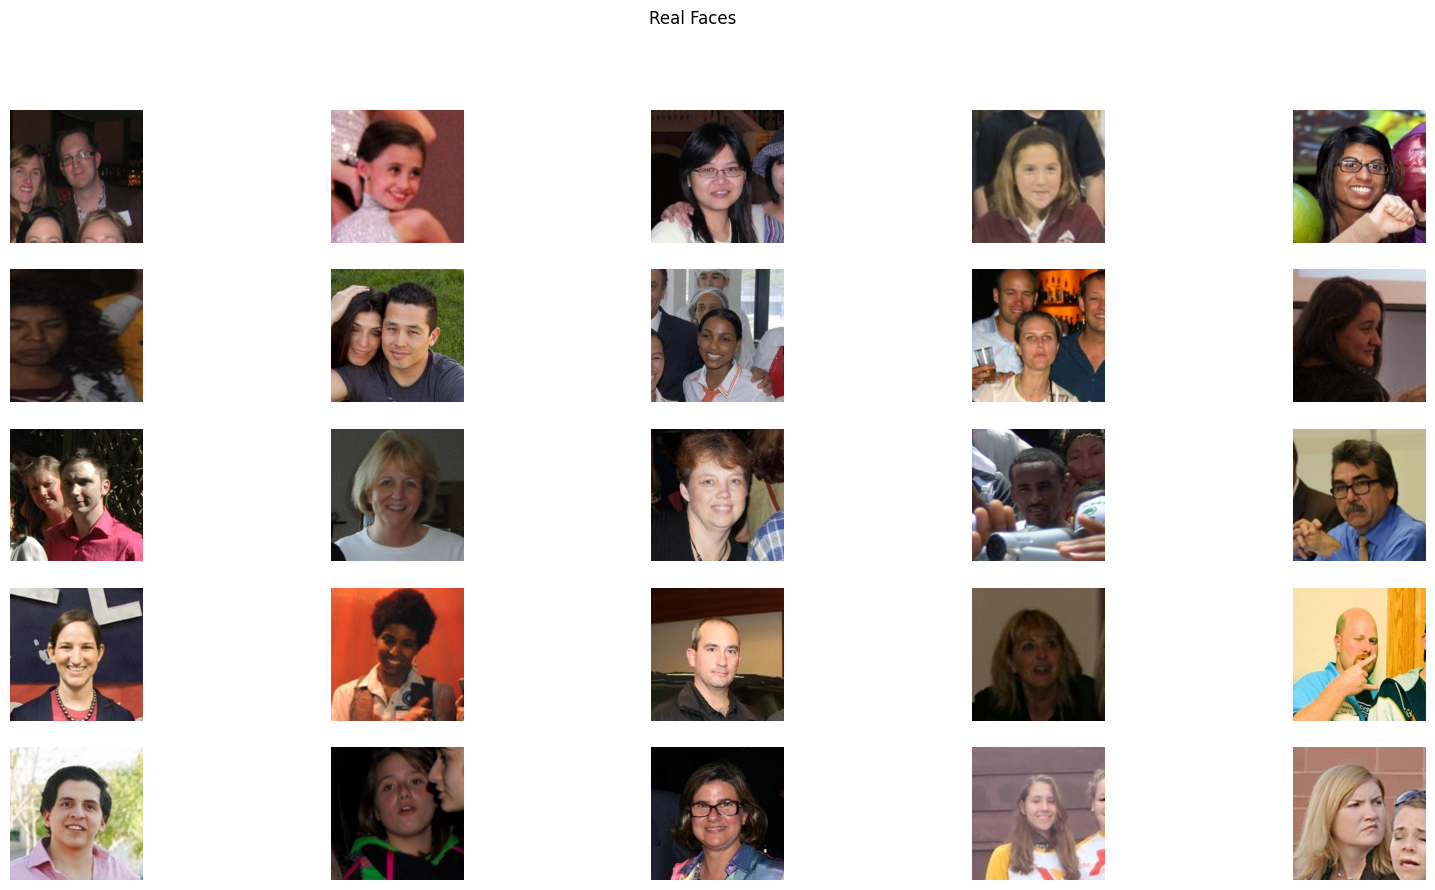

In [ ]:
plot_image(path,'Real')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

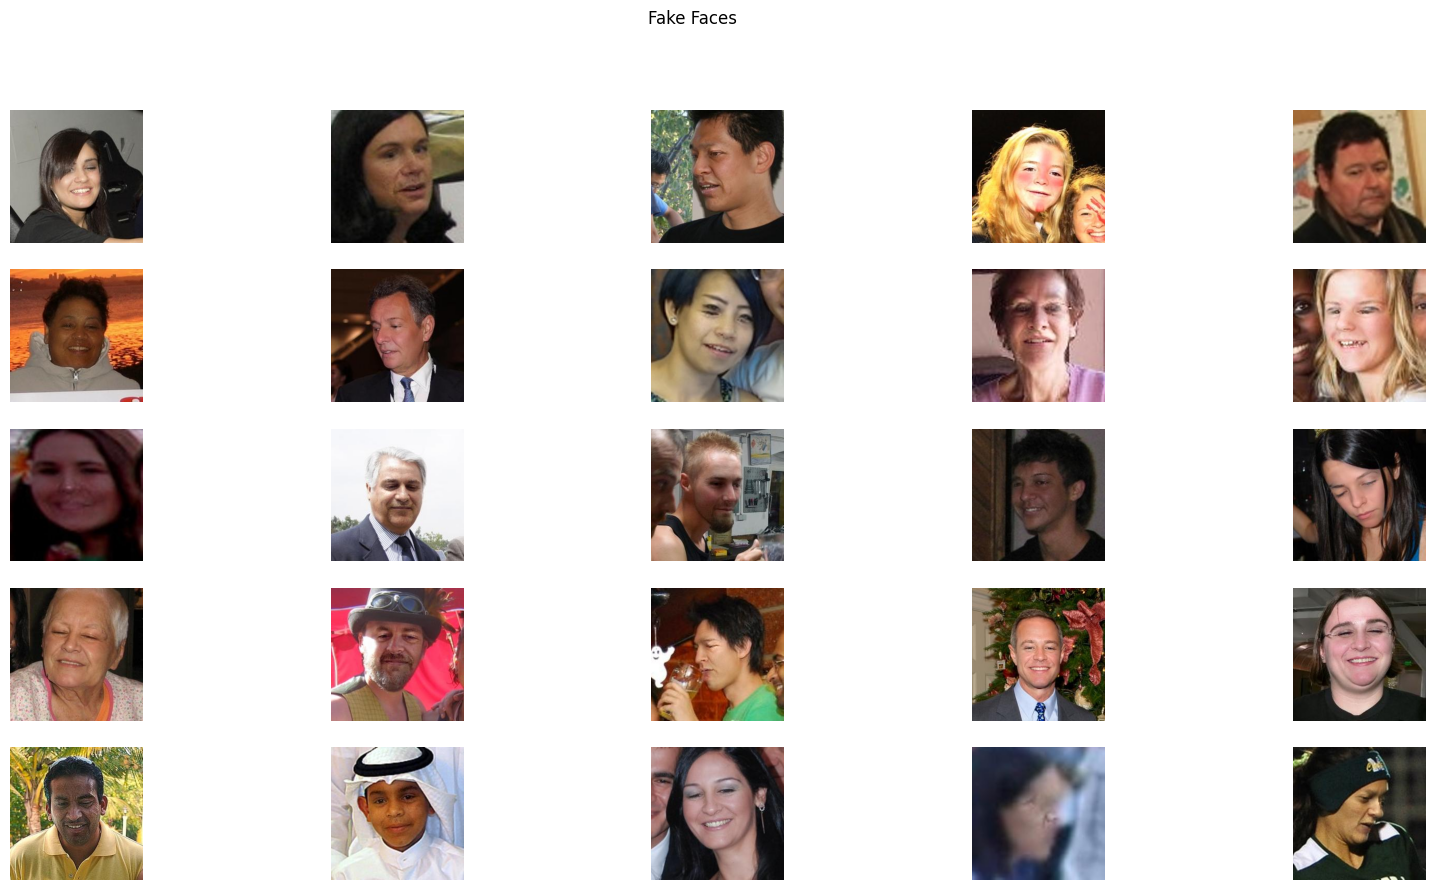

In [ ]:
plot_image(path,'Fake')

In [ ]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/Train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/Validation',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     )
test_set = val_test_datagen.flow_from_directory(path + '/Test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


{'Fake': 0, 'Real': 1}

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (128,128,3), classes = 2)
model= Sequential()
model.add(base_model)
model.add(Flatten())
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 14714688 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=2))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))

model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(64,activation=('relu')))
model.add(Dense(32,activation=('relu')))
model.add(Dense(8,activation=('relu')))
#model.add(Dropout(.4))
model.add(Dense(2,activation=('softmax')))

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8

In [ ]:
batch_size= 64
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_set, batch_size = 64, epochs = 10, validation_data = validation_set, verbose = 1)

Epoch 1/10
2188/2188 [==============================] - 659s 292ms/step - loss: 0.1456 - accuracy: 0.9377 - val_loss: 0.1240 - val_accuracy: 0.9483
Epoch 2/10
2188/2188 [==============================] - 626s 286ms/step - loss: 0.0691 - accuracy: 0.9731 - val_loss: 0.0762 - val_accuracy: 0.9702
Epoch 3/10
2188/2188 [==============================] - 624s 285ms/step - loss: 0.0550 - accuracy: 0.9783 - val_loss: 0.0641 - val_accuracy: 0.9762
Epoch 4/10
2188/2188 [==============================] - 625s 285ms/step - loss: 0.0462 - accuracy: 0.9819 - val_loss: 0.0742 - val_accuracy: 0.9717
Epoch 5/10
2188/2188 [==============================] - 625s 285ms/step - loss: 0.0395 - accuracy: 0.9844 - val_loss: 0.0651 - val_accuracy: 0.9754
Epoch 6/10
2188/2188 [==============================] - 624s 285ms/step - loss: 0.0346 - accuracy: 0.9864 - val_loss: 0.1258 - val_accuracy: 0.9560
Epoch 7/10
2188/2188 [==============================] - 625s 286ms/step - loss: 0.0313 - accuracy: 0.9876 - val_

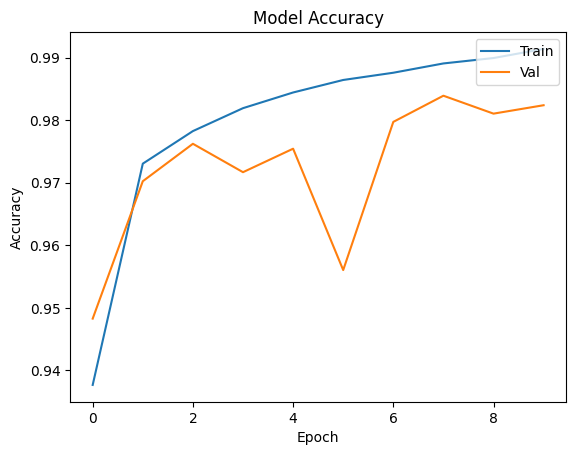

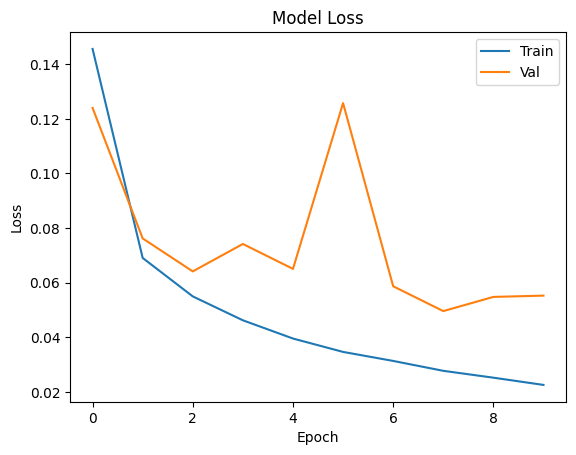

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model.save('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model.evaluate(test_set)

171/171 [==============================] - 17s 97ms/step - loss: 0.2231 - accuracy: 0.9313


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_new = load_model('/content/Model.h5')

In [ ]:
loss, accu = model_new.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

171/171 [==============================] - 15s 82ms/step - loss: 0.2231 - accuracy: 0.9313
Final Test Acccuracy = 93.132
